In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import model_selection

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
#pip install matplotlib

In [ ]:
df = pd.read_csv('cleaned_data.csv')
df

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   20001 non-null  int64 
 1   content      20001 non-null  object
 2   annotation   20001 non-null  int64 
 3   msg_clean    19995 non-null  object
 4   tokenized    20001 non-null  object
 5   msg_no_sw    20001 non-null  object
 6   msg_stemmed  20001 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


# vectorization using tfidf

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('cleaned_data.csv')
data2 = df.msg_stemmed
tfidf = TfidfVectorizer()
response = tfidf.fit_transform(data2)

tfidf.vocabulary_


# tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
# tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())



{'get': 5326,
 'fuck': 5095,
 'real': 11002,
 'dude': 4025,
 'dirti': 3734,
 'come': 2878,
 'crook': 3215,
 'rengel': 11154,
 'dem': 3556,
 'corrupt': 3074,
 'joke': 7327,
 'make': 8339,
 'republican': 11175,
 'look': 8122,
 'like': 7950,
 'could': 3090,
 'day': 3435,
 'let': 7887,
 'hour': 6398,
 'ping': 10245,
 'later': 7770,
 'sched': 11625,
 'write': 14897,
 'book': 1893,
 'dont': 3874,
 'finish': 4767,
 'enclos': 4271,
 'shower': 11981,
 'hate': 5952,
 'half': 5866,
 'ass': 1068,
 'job': 7302,
 'what': 14582,
 'reasonon': 11027,
 'behind': 1541,
 'sens': 11764,
 'wtf': 14911,
 'talk': 13058,
 'men': 8606,
 'that': 13256,
 'menag': 8607,
 'gay': 5248,
 'ill': 6789,
 'save': 11587,
 'troubl': 13742,
 'sister': 12079,
 'big': 1661,
 'ol': 9650,
 'franc': 4990,
 'block': 1802,
 'way': 14459,
 'twitter': 13855,
 'im': 6811,
 'dead': 3471,
 'seriousr': 11788,
 'athlet': 1127,
 'never': 9250,
 'cheat': 2538,
 'even': 4410,
 'appear': 955,
 'level': 7893,
 'serious': 11784,
 'think': 1334

In [7]:
print(response)

  (0, 4025)	0.5682792040556577
  (0, 11002)	0.6408032598619846
  (0, 5095)	0.3314842764826402
  (0, 5326)	0.3956616014132561
  (1, 7950)	0.14651869249700017
  (1, 8122)	0.19580922637644363
  (1, 11175)	0.3484616843798271
  (1, 8339)	0.18256718401575606
  (1, 7327)	0.27903636779741225
  (1, 3074)	0.3585202414704814
  (1, 3556)	0.3809181888954825
  (1, 11154)	0.3809181888954825
  (1, 3215)	0.371987137201958
  (1, 2878)	0.2062904251423602
  (1, 3734)	0.303035480523169
  (1, 5095)	0.1268015531808385
  (2, 1893)	0.3142196132029496
  (2, 14897)	0.3161672107843206
  (2, 11625)	0.4540654470439041
  (2, 7770)	0.33651620260790543
  (2, 10245)	0.4209957308710985
  (2, 6398)	0.30938413480442817
  (2, 7887)	0.26601448859344523
  (2, 3435)	0.2348345052095611
  (2, 3090)	0.2453001994805078
  :	:
  (19996, 3874)	0.40912124611774253
  (19997, 9412)	0.4225497641656377
  (19997, 1340)	0.38462990774956873
  (19997, 8665)	0.3520003188481805
  (19997, 8991)	0.38462990774956873
  (19997, 15011)	0.19413198989

In [8]:
#pip install matplotlib

In [9]:
data2.shape

(20001,)

<AxesSubplot:>

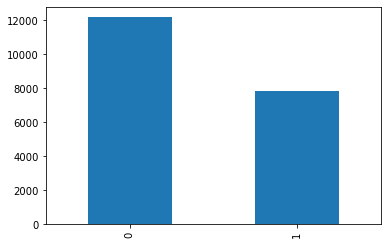

In [10]:
df['annotation'].value_counts().sort_index().plot.bar()

In [11]:
#Biasness
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


In [12]:
#splitting dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(response, df.annotation, test_size=0.3, random_state=88)

In [13]:
x_train.shape

(14000, 15271)

In [14]:
x_test.shape

(6001, 15271)

# multinomial naive bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train)
prediction = model.predict(x_test)

In [16]:

nr_correct = (y_test == model.predict(x_test)).sum()

model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
print(f'{nr_correct} documents classified correctly')


4588 documents classified correctly


In [18]:
nr_incorrect = y_test.size - nr_correct

print(f'Number of documents incorrectly classified is {nr_incorrect}')

Number of documents incorrectly classified is 1413


In [19]:
#accuracy M naive bayes

print("Accuracy:",accuracy_score(prediction,y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction))

Accuracy: 0.7645392434594235
Confusion Matrix: 
 [[3368  297]
 [1116 1220]]


# decision tree classifier

In [20]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
prediction1 = dtc.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, prediction1))
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction1))


Accuracy:  0.8660223296117314
Confusion Matrix: 
 [[3012  653]
 [ 151 2185]]


# logistic regression

In [21]:
lgr = LogisticRegression().fit(x_train
                            , y_train)
prediction2= lgr.predict(x_test)


print("Accuracy: ",metrics.accuracy_score(prediction2,y_test))
print("Confusion Matrix: \n", confusion_matrix(prediction2,y_test))

Accuracy:  0.7697050491584736
Confusion Matrix: 
 [[3214  931]
 [ 451 1405]]


In [22]:
#from sklearn.neural_network import MLPClassifier

#model4 = MLPClassifier().fit(x_train, y_train)
#pred4 = model4.predict(x_test)

#score4 = accuracy_score(pred4, y_test)
#print("Confusion matrix \n", confusion_matrix(y_test, pred4))
#print("Accuracy of decision MLP = ", score4)

# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)

prediction3 = svm.predict(x_test)

  prediction3

In [ ]:
print("Accuracy: ",metrics.accuracy_score(prediction3,y_test))
print("Confusion Matrix: \n", confusion_matrix(prediction3,y_test))

In [25]:
#svm2 = SVC(kernel = 'rbf')
#svm2.fit(x_train, y_train)
#prediction4 = svm2.predict(x_test)

#print("Accuracy with default rbf kerenel: ",metrics.accuracy_score(prediction4,y_test))
#print("Confusion Matrix: \n", confusion_matrix(prediction4,y_test))

In [26]:
#svm3 = SVC(kernel = 'rbf', gamma = 5, C=7, random_state=0 )
#svm3.fit(x_train, y_train)
#prediction5 = svm3.predict(x_test)

#print("Accuracy with default rbf kerenel: ",metrics.accuracy_score(prediction5,y_test))
#print("Confusion Matrix: \n", confusion_matrix(prediction5,y_test))

In [ ]:
text2=input("enter text: ")

import string
string.punctuation

def remove_punctuation(text2):
    data_nopunct = "".join([c for c in text2 if c not in string.punctuation])
    return data_nopunct

import re
def tokenize(tweet):
    tokens = re.split('\W+',tweet)
    return tokens

import nltk
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tok):
    token_clean = [word for word in tok if word not in stopwords]
    return token_clean




from nltk.stem import PorterStemmer 
ps = PorterStemmer()


def stemming(sw1):
    text = [ps.stem(word) for word in sw1]
    return text

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()

dtc = DecisionTreeClassifier().fit(x_train, y_train)
prediction1 = dtc.predict(x_test)


In [ ]:


def final_prediction(text2):

    tweet=remove_punctuation(text2)
    tok=tokenize(tweet)
    sw1=remove_stopwords(tok)
    stem=stemming(sw1)
    vec=tfidf.fit_transform(stem)
    fp=dtc.predict(vec)
    return fp
final_prediction(text2)
    

In [12]:
text2=input("enter text: ")


enter text: 
